In [1]:
### Struktura danych

import numpy as np

filename = f"ToyMC/output_0/toymc_25gev_0deg.dat"
events_to_show = 3  

print(f"Podgląd pliku: {filename}\n")

try:
    with open(filename, 'rb') as infile:
        for i in range(events_to_show):
            print(f"=== Zdarzenie numer {i+1} ===")
            
            header = np.fromfile(infile, dtype=np.int64, count=4)
            if len(header) < 4: break
            
            shift = np.fromfile(infile, dtype=np.float64, count=4)
            
            Nlist = header[3]  
            
            idlist = np.fromfile(infile, dtype=np.int64, count=Nlist)
            
            elist = np.fromfile(infile, dtype=np.float64, count=Nlist)
            
            print(f"  [Header] ID: {header[0]}, N_dep: {header[1]}, ?: {header[2]}, N_list (piksele): {Nlist}")
            print(f"  [Prawda] X: {shift[0]:.4f} mm, Y: {shift[1]:.4f} mm, Kąt X: {shift[2]:.4f} deg, Kąt Y: {shift[3]:.4f} deg")
            
            print(f"  [Dane]   Pierwsze 5 zapalonych pikseli:")
            for j in range(min(5, Nlist)):
                layer = idlist[j] // 100000
                idx_x = (idlist[j] % 100000) // 100
                idx_y = idlist[j] % 100
                print(f"           - Piksel {idlist[j]} (L:{layer}, X:{idx_x}, Y:{idx_y}) -> {elist[j]:.4f} MIP")
            print("\n")

except FileNotFoundError:
    print("Nie znaleziono pliku.")

Podgląd pliku: ToyMC/output_0/toymc_25gev_0deg.dat

=== Zdarzenie numer 1 ===
  [Header] ID: 0, N_dep: 930, ?: 0, N_list (piksele): 64
  [Prawda] X: 13.3835 mm, Y: -2.5447 mm, Kąt X: 0.0000 deg, Kąt Y: 0.0000 deg
  [Dane]   Pierwsze 5 zapalonych pikseli:
           - Piksel 4707 (L:0, X:47, Y:7) -> 2.6919 MIP
           - Piksel 5007 (L:0, X:50, Y:7) -> 7.8792 MIP
           - Piksel 104907 (L:1, X:49, Y:7) -> 2.2026 MIP
           - Piksel 105007 (L:1, X:50, Y:7) -> 12.2305 MIP
           - Piksel 205001 (L:2, X:50, Y:1) -> 0.5178 MIP


=== Zdarzenie numer 2 ===
  [Header] ID: 1, N_dep: 1005, ?: 0, N_list (piksele): 62
  [Prawda] X: 1.2939 mm, Y: 5.9204 mm, Kąt X: 0.0000 deg, Kąt Y: 0.0000 deg
  [Dane]   Pierwsze 5 zapalonych pikseli:
           - Piksel 4808 (L:0, X:48, Y:8) -> 0.9716 MIP
           - Piksel 4809 (L:0, X:48, Y:9) -> 9.0527 MIP
           - Piksel 104707 (L:1, X:47, Y:7) -> 5.4992 MIP
           - Piksel 104708 (L:1, X:47, Y:8) -> 8.5124 MIP
           - Piksel 104709

# Struktura danych 

Powyższy kod ma na na celu wizualizację struktury danych dla wiązki o energii 2.5 GeV bez rozmycia kątowego. Dane dla pozostałych przypadków są zapisane w analogiczny sposób. 

**Nagłówek (Header)**  
Mamy linię `[Header] ID: 0, N_dep: 930, ?: 0, N_list (piksele): 64` 
- `ID: 0` Numer porządkowy zdarzenia (Event ID).
- `N_dep: 930`: Liczba pierwotnych depozytów energii w symulacji (mikroskopowe interakcje)
- `N_list (piksele): 64`:  Liczba aktywnych pikseli (tzw. hits). Jest to liczba komórek, które po zsumowaniu depozytów zarejestrowały energię. Tylko te dane służą do rekonstrukcji. 

**Prawdziwy wynik**   
Wiersz `[Prawda] X: 13.3835 mm, Y: -2.5447 mm, Kąt X: 0.0000 deg, Kąt Y: 0.0000 deg]` to wartości wartości referencyjne, do których będziemy dążyć w rekonstrukcji. $(X, Y)$ wskazuje punkt uderzenia cząstki względem środka czoła detektora. Kąty $(\theta_x, \theta_y) = 0.0000^\circ$ potwierdzają, że analizujemy dane z wiązki prostopadłej do powierzchni detektora.


**Dane pomiarowe (zarejestrowane sygnały)**  
Sekcja ta pokazuje listę zapalonych pikseli. Przeanalizujmy dane dla pierwszego przypadku (ID: 0)

Środek detektora (0 mm) to indeks $X \approx 47.5$. Rozmiar piksela to 5,625 mm, natomiast prawdziwa pozycja $X = 13.38$ mm oznacza przesunięcie o ok. $+2.4$ piksela ($13.38 / 5.625 \approx 2.38$). Spodziewamy się więc sygnału wokół indeksu $X \approx 47,5 + 2,4 \approx 50$. 

Odczyt pikseli z poglądu:
1) `Piksel 5007 (L:0, X:50, Y:7) -> 7.8792 MIP`. To bardzo silny sygnał (prawie 8 MIP) dokładnie w kolumnie X=50. Niemal idealnie zgadza się to z wyliczoną pozycją uderzenia. To jest prawdopodobnie rdzeń kaskady w pierwszej warstwie (L:0) 
2) `Piksel 105007 (L:1, X:50, Y:7) -> 12.2305 MIP`. W kolejnej warstwie (L:1), w tym samym miejscu (X:50), sygnał jest jeszcze silniejszy (12 MIP). Kaskada się rozwija.
3) `Piksel 4707 (L:0, X:47, Y:7) -> 2.6919 MIP`. Mamy sygnał w kolumnie $X=47$. Jest to ogon kaskady, oddalony o około 3 piksele od centrum uderzenia. 

**Kolejne zdarzenie**  
Plik binarny jest podzielony na bloki, które zawierają header, prawdziwy wynik oraz zarejestrowane sygnały. Kolejne bloki (czyli kolejne uderzenie pozytonu) oddzielone są od siebie poprzez `ID`. 

# Etap I - Kalibracja 

Celem tego etapu jest znalezienie optymalnej wartości parametru odcięcia szumu ($E_{cut}$) dla algorytmu rekonstrukcji pozycji. Wykorzystujemy do tego zbiór danych `output_0`, w którym cząstki padają prostopadle na detektor, co pozwala wyeliminować błędy wynikające z geometrii (kąta) i skupić się wyłącznie na fizyce rozwoju kaskady. 

Dla każdego zdarzenia pozycja uderzenia $x_{reco}$ jest wyliczana jako średnia ważona:
$$
x_{reco} = \frac{\sum_{i} x_i \cdot w_i}{\sum_{i} w_i}
$$
gdzie $x_i$ to pozycja $i$-tego piksela, a waga $w_i$ zdefiniowana jest wzorem:
$$
w_i = \max\big(0,\ln( \frac{E_i}{E_{cut}}) \big)
$$
W praktyce piksele o energii $E_i < E_{cut}$ otrzymują wagę 0, co oznacza ich wykluczenie z sumowania. Dzięki temu szum elektroniki oraz dalekie, mało znaczące fluktuacje kaskady (tzw. ogony) nie zaburzają wyniku. 

**Transformacja układu współrzędnych**  
Dane surowe operują na indeksach pikseli (liczby całkowite od 0 do 95). Aby uzyskać wynik fizyczny w milimetrach, algorytm wykonuje transformację:
$$
x_{mm} = (\text{Indeks}_{reco} - \text{CENTER\_X\_IDX}) \cdot \text{PIXEL\_SIZE}
$$
gdzie `PIXEL_SIZE = 5,625`mm, natomiast `CENTER_X_IDX` to geometryczny środek detektora (dla 96 pikseli jest to indeks 47.5). Równanie to zamienia bezwymiarową odległość w indeksach na rzeczywiste przesunięcie względem osi detektora.  


**Procedura optymalizacji (Skanowanie $E_{cut}$)**  
Optymalna wartość $E_{cut}$ nie jest stała – zależy od energii cząstki (im wyższa energia, tym gęstsza kaskada i inny stosunek sygnału do tła). Wyznaczamy ją empirycznie poprzez minimalizację błędu rekonstrukcji.  

Algorytm realizuje następującą procedurę dla każdego pliku energetycznego:
1) Wybieramy próbną wartość $E_{cut}$ 
2) Dla wszystkich zdarzeń w pliku rekonstruujemy pozycję $x_{reco}$ 
3) Liczymy różnicę względem prawdziwej pozycji $\Delta x = x_{reco} - x_{true}$
4) Obliczamy odchylenie standardowe $\sigma$: $$\sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (\Delta x_i - \overline{\Delta x})^2 }$$ gdzie  $\overline{\Delta x}$ to średnia arytmetyczna $\Delta x $ obliczona z danych. Naszym celem jest otrzymanie takiego $E_{cut}$, dla którego $\sigma$ będzie najmniejsza. 



<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pawel\AppData\Local\Temp\ipykernel_23156\4288330188.py:88: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("Niepewność $\sigma$ [mm]")


Rozpoczynam analizę
>> Analiza zdarzenia 2.5 GeV. Minimum: 6.0 MIP (Sigma: 1.5468 mm)
>> Analiza zdarzenia 5.0 GeV. Minimum: 6.0 MIP (Sigma: 1.2193 mm)
>> Analiza zdarzenia 7.5 GeV. Minimum: 9.0 MIP (Sigma: 0.8421 mm)
>> Analiza zdarzenia 10.0 GeV. Minimum: 9.0 MIP (Sigma: 0.7261 mm)
>> Analiza zdarzenia 12.5 GeV. Minimum: 10.0 MIP (Sigma: 0.6270 mm)
>> Analiza zdarzenia 15.0 GeV. Minimum: 10.0 MIP (Sigma: 0.5664 mm)
>> Analiza zdarzenia 17.5 GeV. Minimum: 10.0 MIP (Sigma: 0.5212 mm)
>> Analiza zdarzenia 20.0 GeV. Minimum: 11.0 MIP (Sigma: 0.4571 mm)


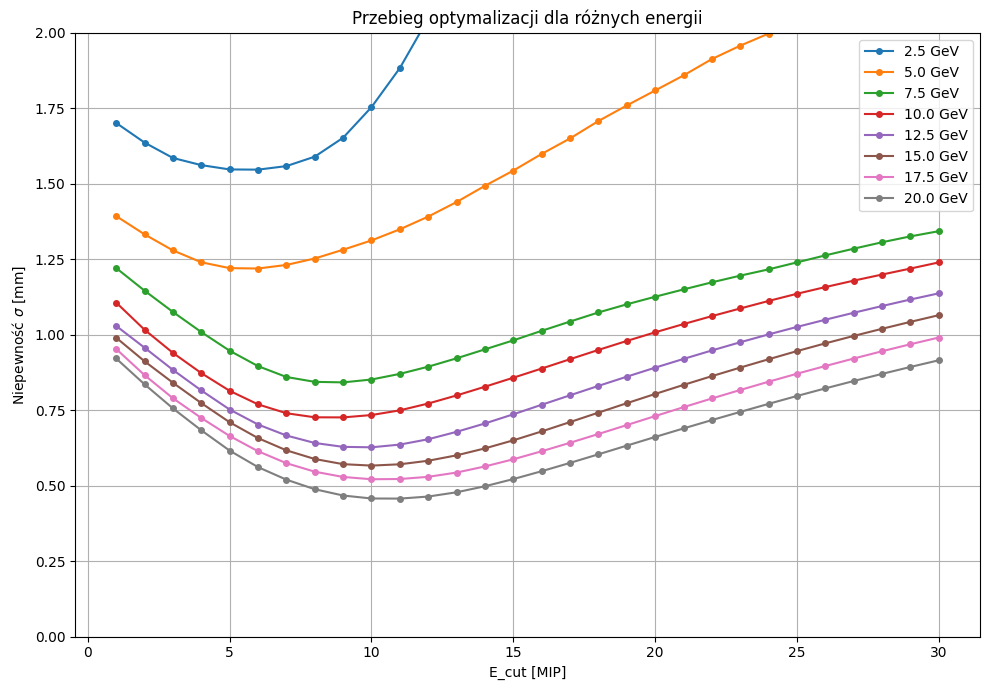

In [1]:
### Wizualizacja wartośći E_cut od niepewności

import numpy as np
import matplotlib.pyplot as plt


energies = [25, 50, 75, 100, 125, 150, 175, 200] # Lista energii wiązki pozytonów w danych. 25 GeV = 2.5 GeV itd.

scan_values = np.arange(1.0, 31.0, 1.0) # Zakres wartości parametru E_cut, który będzie skanowany 

# Transformacja pikseli na mm
Nx = 96
PIXEL_SIZE = 5.625
CENTER_X_IDX = (Nx - 1) / 2.0

Nevt_to_read = 3000  # Liczba zdarzeń do odczytania z pliku

curves_data = {}

print(f"Rozpoczynam analizę")

for energy in energies:
    filename = f"ToyMC/output_0/toymc_{energy}gev_0deg.dat"
    
    all_events = [] #Zbiór danych 
    try:
        with open(filename, 'rb') as infile:
            for _ in range(Nevt_to_read):
                head = np.fromfile(infile, dtype=np.int64, count=4) #ID, N_dep, ?, N_list
                if len(head) < 4: break
                shift = np.fromfile(infile, dtype=np.float64, count=4) # [True_X, True_Y, True_AngleX, True_AngleY]
                true_x = shift[0] # Prawdziwa pozycja X,Y oraz kąty
                Nlist = head[3] # Liczba zapalonych pikseli
                if Nlist < 0: break 
                idlist = np.fromfile(infile, dtype=np.int64, count=Nlist) # ID zapalonych pikseli
                elist = np.fromfile(infile, dtype=np.float64, count=Nlist) # Energia w zapalonych pikselach
                all_events.append((true_x, idlist, elist)) # Dodajemy zdarzenie do listy 
    except FileNotFoundError:
        print(f"Pominięto, brak pliku {filename}")
        continue

    sigmas_for_energy = []
    cuts_for_energy = []

    for E_curr in scan_values:
        delta_x_list = []
        for true_x, idlist, elist in all_events:
            idx_arr = (idlist % 100000) // 100 # Dekodowanie indeksów X z ID pikseli
            mask = elist > E_curr # Tworzymy maskę pikseli powyżej progu E_cut
            if np.sum(mask) > 0: # Sprawdzamy, czy są piksele powyżej progu
                weights = np.log(elist[mask] / E_curr) # Obliczamy wagi logarytmiczne
                sum_w = np.sum(weights)
                if sum_w > 0:
                    mean_idx = np.sum(idx_arr[mask] * weights) / sum_w # Liczymy średnią ważoną (x_reco)
                    reco_x = (mean_idx - CENTER_X_IDX) * PIXEL_SIZE # Przeliczamy na mm
                    delta_x_list.append(reco_x - true_x) # Liczymy Delta X
        
        if len(delta_x_list) > 50: #
            sigma = np.std(delta_x_list) # Obliczamy sigma dla bieżącego E_cut
            sigmas_for_energy.append(sigma) 
            cuts_for_energy.append(E_curr) #
        else:
            break
    
    # Zapisujemy dane do wykresu
    curves_data[energy] = (cuts_for_energy, sigmas_for_energy)

    if len(sigmas_for_energy) > 0:
        min_sigma = min(sigmas_for_energy)
        best_idx = sigmas_for_energy.index(min_sigma)
        best_ecut = cuts_for_energy[best_idx]
        
        print(f">> Analiza zdarzenia {energy / 10} GeV. Minimum: {best_ecut:.1f} MIP (Sigma: {min_sigma:.4f} mm)")
    else:
        print(f">> Analiza pliku: {energy} GeV. Błąd: Brak danych")


# Rysowanie wykresu
plt.figure(figsize=(10, 7))

for energy in energies:
    if energy in curves_data:
        x, y = curves_data[energy]
        plt.plot(x, y, 'o-', label=f'{energy /10 } GeV', markersize=4)

plt.title("Przebieg optymalizacji dla różnych energii")
plt.xlabel("E_cut [MIP]")
plt.ylabel("Niepewność $\sigma$ [mm]")
plt.legend()
plt.grid(True)
plt.ylim(0, 2.0) 

plt.tight_layout()
plt.show()

### Wnioski wynikające z wizualizacji wartości $E_{cut}$
Przy niskim $E_{cut}$ uwzględniamy w obliczeniach szum elektroniki i bardzo słabe cząstki z dalekich części kaskady (ogony). Zaburza to wynik średniej ważonej, zwiększając rozrzut wyników. Następnie, zwiększając $E_{cut}$, stopniowo odcinamy ten szum, dzięki czemu $\sigma$ maleje. W pewnym momencie natrafiamy na obszar wycietego szumu — to tam poszukujemy minimum. W pewnym momencie osiągamy optimum – stan równowagi, w którym szum jest wyeliminowany, a sygnał wciąż zachowany.
Gdy zwiększamy $E_{cut}$ jeszcze bardziej, próg staje się zbyt restrykcyjny. Zaczynamy odrzucać piksele, które niosą ważną informację o położeniu centrum kaskady, co ponownie pogarsza niepewność.

Zauważmy, że dla wszystkich badanych energii minimum znajduje się w przedziale pomiędzy 4 a 15 MIP. W kolejnym kroku zawęzimy zakres poszukiwań i zwiększymy gęstość próbkowania w tym obszarze, aby wyznaczyć $E_{cut}$ z większą precyzją.

Obserwujemy, że im wyższa energia cząstki, tym optymalne $E_{cut}$ przesuwa się w stronę wyższych wartości. Wynika to z faktu, że kaskady o wyższej energii mają gęstsze i bardziej energetyczne centrum, co pozwala na zastosowanie wyższego progu odcięcia bez utraty kluczowych danych, jednocześnie skuteczniej eliminując tło.

Dodatkowo, im wyższa energia, tym niższa jest minimalna $\sigma$. Wynika to ze statystyki kaskady elektromagnetycznej – więcej cząstek wtórnych to lepsze próbkowanie sygnału.

Rozpoczynam kalibrację (zakres 4.0-15.0 MIP, krok 0.1)

>> Analiza zdarzenia 2.5 GeV
ZWYCIĘZCA: 6.5 MIP (Sigma: 1.5445 mm)

>> Analiza zdarzenia 5.0 GeV
ZWYCIĘZCA: 6.5 MIP (Sigma: 1.1505 mm)

>> Analiza zdarzenia 7.5 GeV
ZWYCIĘZCA: 8.5 MIP (Sigma: 0.8643 mm)

>> Analiza zdarzenia 10.0 GeV
ZWYCIĘZCA: 8.6 MIP (Sigma: 0.7256 mm)

>> Analiza zdarzenia 12.5 GeV
ZWYCIĘZCA: 9.5 MIP (Sigma: 0.6248 mm)

>> Analiza zdarzenia 15.0 GeV
ZWYCIĘZCA: 10.0 MIP (Sigma: 0.5681 mm)

>> Analiza zdarzenia 17.5 GeV
ZWYCIĘZCA: 10.3 MIP (Sigma: 0.5111 mm)

>> Analiza zdarzenia 20.0 GeV
ZWYCIĘZCA: 10.7 MIP (Sigma: 0.4678 mm)


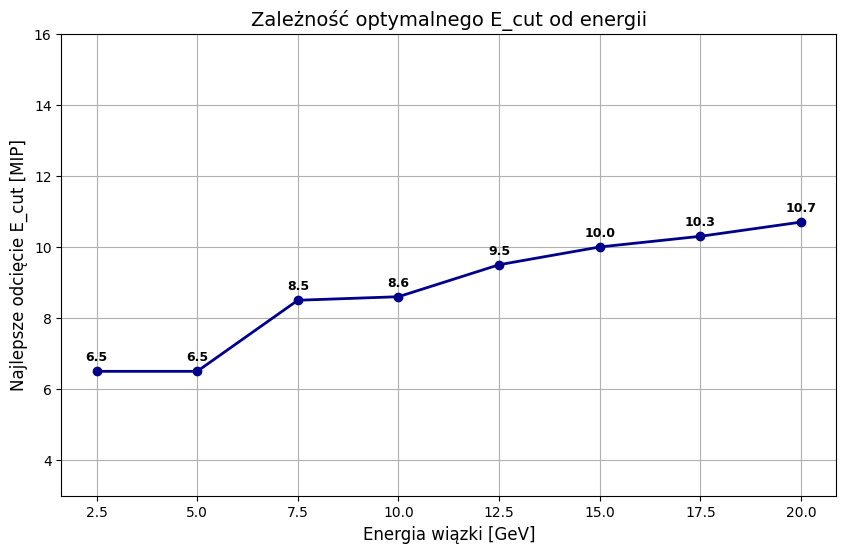


FINALNA TABELA KALIBRACYJNA
Energia [GeV]   | Optymalne E_cut [MIP]     | Sigma [mm]          
-----------------------------------------------------------------
2.5             | 6.5                       | 1.5445              
5.0             | 6.5                       | 1.1505              
7.5             | 8.5                       | 0.8643              
10.0            | 8.6                       | 0.7256              
12.5            | 9.5                       | 0.6248              
15.0            | 10.0                      | 0.5681              
17.5            | 10.3                      | 0.5111              
20.0            | 10.7                      | 0.4678              


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lista energii wiązki pozytonów w danych. 25 GeV = 2.5 GeV itd.
file_energies = [25, 50, 75, 100, 125, 150, 175, 200] 

# Zakres wartości parametru E_cut, który będzie skanowany
# (Tu zawęziliśmy zakres do 4.0-15.0, bo tam spodziewamy się minimum)
scan_values = np.arange(4.0, 15.1, 0.1) 

Nx = 96
PIXEL_SIZE = 5.625
CENTER_X_IDX = (Nx - 1) / 2.0
Nevt_to_read = 5000 # Liczba zdarzeń do odczytania z pliku

final_best_ecuts = []
final_best_sigmas = []

# Lista do przechowywania rzeczywistych energii (w GeV) do wykresu
real_energies_gev = []

print(f"Rozpoczynam kalibrację (zakres 4.0-15.0 MIP, krok 0.1)")

for energy_code in file_energies:
    # Obliczamy rzeczywistą energię dla wyświetlania i wykresów
    real_energy = energy_code / 10.0
    real_energies_gev.append(real_energy)

    filename = f"ToyMC/output_0/toymc_{energy_code}gev_0deg.dat"
    print(f"\n>> Analiza zdarzenia {real_energy:.1f} GeV")
    
    all_events = [] 
    try:
        with open(filename, 'rb') as infile:
            for _ in range(Nevt_to_read):
                head = np.fromfile(infile, dtype=np.int64, count=4) #ID, N_dep, ?, N_list
                if len(head) < 4: break
                shift = np.fromfile(infile, dtype=np.float64, count=4) # [True_X, True_Y, True_AngleX, True_AngleY]
                true_x = shift[0] # Prawdziwa pozycja X,Y oraz kąty
                Nlist = head[3] # Liczba zapalonych pikseli
                if Nlist < 0: break 
                idlist = np.fromfile(infile, dtype=np.int64, count=Nlist) # ID zapalonych pikseli
                elist = np.fromfile(infile, dtype=np.float64, count=Nlist) # Energia w zapalonych pikselach
                all_events.append((true_x, idlist, elist)) # Dodajemy zdarzenie do listy 
    except FileNotFoundError:
        print(f"POMINIĘTO: {filename}")
        final_best_ecuts.append(None)
        final_best_sigmas.append(None)
        continue

    local_sigmas = []
    local_cuts = [] 

    for E_curr in scan_values:
        delta_x_list = []
        for true_x, idlist, elist in all_events:
            idx_arr = (idlist % 100000) // 100 # Dekodowanie indeksów X z ID pikseli
            mask = elist > E_curr # Tworzymy maskę pikseli powyżej progu E_cut
            if np.sum(mask) > 0: # Sprawdzamy, czy są piksele powyżej progu
                weights = np.log(elist[mask] / E_curr) # Obliczamy wagi logarytmiczne
                sum_w = np.sum(weights)
                if sum_w > 0:
                    mean_idx = np.sum(idx_arr[mask] * weights) / sum_w # Liczymy średnią ważoną (x_reco)
                    reco_x = (mean_idx - CENTER_X_IDX) * PIXEL_SIZE # Przeliczamy na mm
                    delta_x_list.append(reco_x - true_x) # Liczymy Delta X
        
        if len(delta_x_list) > 100:
            sigma = np.std(delta_x_list) # Obliczamy sigma dla bieżącego E_cut
            local_sigmas.append(sigma)
            local_cuts.append(E_curr)

    # Znalezienie minimum dla danej energii
    if len(local_sigmas) > 0:
        min_sigma = min(local_sigmas)
        best_idx = local_sigmas.index(min_sigma)
        best_e = local_cuts[best_idx]
        
        final_best_ecuts.append(best_e)
        final_best_sigmas.append(min_sigma)
        
        print(f"ZWYCIĘZCA: {best_e:.1f} MIP (Sigma: {min_sigma:.4f} mm)")
    else:
        print("BŁĄD: Brak wystarczających danych w zadanym zakresie.")
        final_best_ecuts.append(None)
        final_best_sigmas.append(None)

# Wykres końcowy
plt.figure(figsize=(10, 6))

plt.plot(real_energies_gev, final_best_ecuts, 'o-', color='darkblue', linewidth=2)

plt.title("Zależność optymalnego E_cut od energii", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel("Najlepsze odcięcie E_cut [MIP]", fontsize=12)
plt.grid(True)

# Opis wartości na wykresie
for x, y in zip(real_energies_gev, final_best_ecuts):
    if y is not None:
        plt.text(x, y + 0.3, f"{y:.1f}", ha='center', fontsize=9, fontweight='bold')

plt.ylim(3, 16) 
plt.show()

# Tabela końcowa
print("\nFINALNA TABELA KALIBRACYJNA")
print(f"{'Energia [GeV]':<15} | {'Optymalne E_cut [MIP]':<25} | {'Sigma [mm]':<20}")
print("-" * 65)

# Iterujemy po rzeczywistych energiach
for e, cut, sig in zip(real_energies_gev, final_best_ecuts, final_best_sigmas):
    if cut is not None:
        print(f"{e:<15.1f} | {cut:<25.1f} | {sig:<20.4f}")

# Podsumowanie Etapu I (Kalibracja pozycji)

Otrzymane wyniki wykazują wyraźną zależność między energią cząstki pierwotnej a optymalnym progiem odcięcia. Poniższa tabela stanowi mapę kalibracyjną, która zostanie użyta w dalszych analizach.
| Energia Wiązki [GeV] | Optymalne $E_{cut}$ [MIP] | Niepewność  $\sigma_x$ [mm] |
| :---: | :---: | :---: |
| 2,5 | 6,5 | 1,5445 |
| 5,0 | 6,5 | 1,1505 |
| 7,5 | 8,5 | 0,8643 |
| 10,0 | 8,6 | 0,7256 |
| 12,5 | 9,5 | 0,6248 |
| 15,0 | 10,0 | 0,5681 |
| 17,5 | 10,3 | 0,5111 |
| 20,0 | 10,7 | 0,4678 |

# Etap II: Rekonstrukcja Kątowa 
W Etapie II odchodzimy od założenia prostopadłego padania wiązki. Analizujemy dane, w których pozytony wpadają do detektora pod różnym kątem (dane `output_10` oraz `output_20`). 

Celem jest odtworzenie trajektorii cząstki wewnątrz kalorymetru i na tej podstawie wyznaczenie kąta jej wejścia. Wykorzystujemy fakt, że kaskada elektromagnetyczna rozwija się wzdłuż osi lotu cząstki pierwotnej. 

### Metoda: Śledzenie osi kaskady 

Zamiast traktować detektor jako jedną całość (jak w Etapie I), teraz wykorzystamy jego strukturę segmentową. Kalorymetr składa się z 25 warstw.  

Algorytm rekonstrukcji kąta realizowany w kodzie opiera się na następujących krokach: 
1) Dla każdej analizowanej energii pobieramy optymalną wartość $E_{cut}$ wyznaczoną w etapie I. 
2) Dla każdego zdarzenia algorytm iteruje przez wszystkie warstwy detektora ($k = 0...24$).
    W każdej warstwie niezależnie wyznaczamy pozycję środka ciężkości depozytu energii $x_k$, używając metody logarytmicznej: 
    $$x_k = \frac{\sum (x_i \cdot \ln(E_i/E_{cut}))}{\sum \ln(E_i/E_{cut})}$$
    W rezultacie otrzymujemy zbiór punktów pomiarowych $(z_k, x_k)$, gdzie $z_k$ to numer warstwy, a $x_k$ to wyznaczona pozycja w mm. Liczba tych punktów zależy od energii cząstki (głębokości penetracji).
3) Zakładamy, że cząstka porusza się po linii prostej. Jeśli liczba aktywnych warstw wynosi co najmniej 3 (warunek stabilności fitu), dopasowujemy do wyznaczonych punktów funkcję liniową metodą najmniejszych kwadratów `np.polyfit`: 
    $$x(z) = a \cdot z + b$$
    gdzie $z$ to numer warstwy (indeks 0-24), $a$ to nachylenie prostej wyrażone w [mm/warstwę]
4) Samo nachylenie $a$ z fitu mówi nam, o ile milimetrów przesuwa się cząstka na jedną warstwę. Aby uzyskać kąt w stopniach, musimy uwzględnić fizyczną odległość między warstwami (grubość absorbera i sensora `LAYER_THICKNESS = 3.5 mm`):
    $$\tan(\theta) = \frac{\Delta x}{\Delta z_{mm}} = \frac{a}{\text{LAYER\_THICKNESS}}$$
    Stąd ostateczny wzór na rekonstruowany kąt:$$\theta_{reco} = \arctan\left(\frac{a}{3.5}\right) \cdot \frac{180}{\pi}$$

Rozpoczynam analizę danych z rozmyciem +/-10 stopni

>> Analiza 2.5 GeV (używam E_cut=6.5 MIP)...
Niepewność kątowa: 11.6367 stopni
Średnia ostatnia warstwa: 12.59 / 24.0

>> Analiza 5.0 GeV (używam E_cut=6.5 MIP)...
Niepewność kątowa: 8.9096 stopni
Średnia ostatnia warstwa: 15.42 / 24.0

>> Analiza 7.5 GeV (używam E_cut=8.5 MIP)...
Niepewność kątowa: 7.8085 stopni
Średnia ostatnia warstwa: 15.21 / 24.0

>> Analiza 10.0 GeV (używam E_cut=8.6 MIP)...
Niepewność kątowa: 7.0100 stopni
Średnia ostatnia warstwa: 16.27 / 24.0

>> Analiza 12.5 GeV (używam E_cut=9.5 MIP)...
Niepewność kątowa: 6.3908 stopni
Średnia ostatnia warstwa: 16.41 / 24.0

>> Analiza 15.0 GeV (używam E_cut=10.0 MIP)...
Niepewność kątowa: 5.7059 stopni
Średnia ostatnia warstwa: 16.81 / 24.0

>> Analiza 17.5 GeV (używam E_cut=10.3 MIP)...
Niepewność kątowa: 5.4332 stopni
Średnia ostatnia warstwa: 17.14 / 24.0

>> Analiza 20.0 GeV (używam E_cut=10.7 MIP)...
Niepewność kątowa: 5.2331 stopni
Średnia ostatnia warstwa: 17.34 / 

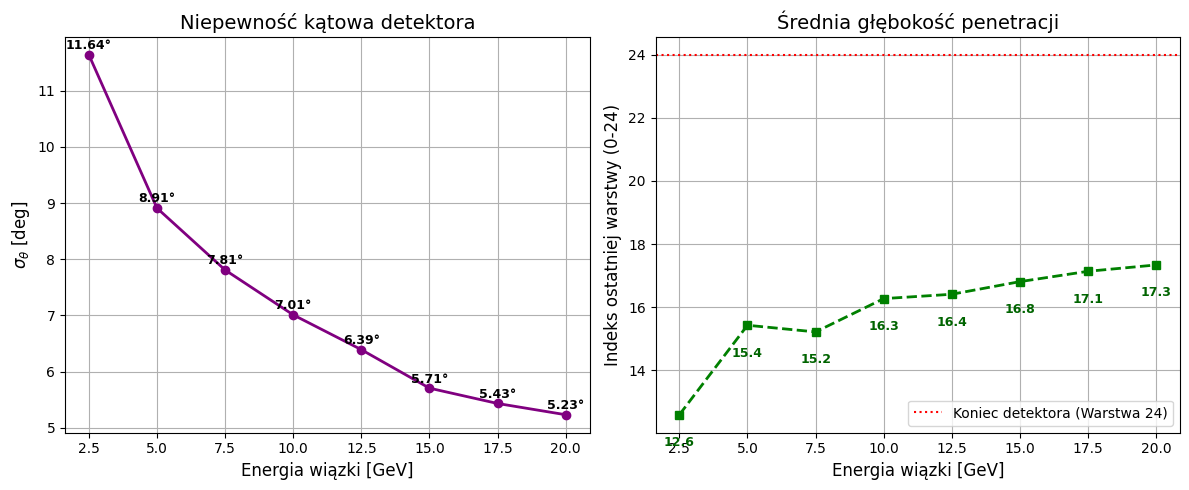


 Wyniki (rozmycie +/-10 stopni) 
Energia [GeV]   | Sigma [deg]     | Śr. Głębokość  
-------------------------------------------------------
2.5             | 11.6367         | 12.59          
5.0             | 8.9096          | 15.42          
7.5             | 7.8085          | 15.21          
10.0            | 7.0100          | 16.27          
12.5            | 6.3908          | 16.41          
15.0            | 5.7059          | 16.81          
17.5            | 5.4332          | 17.14          
20.0            | 5.2331          | 17.34          


In [16]:
### Analiza dla danych z rozmyciem +/- 10 stopni

import numpy as np
import matplotlib.pyplot as plt
import math

# optymalne E_cut dla każdej energii (z etapu I)
calibration_map = {
    25: 6.5, 50: 6.5, 75: 8.5, 100: 8.6,
    125: 9.5, 150: 10.0, 175: 10.3, 200: 10.7
}

file_energies = [25, 50, 75, 100, 125, 150, 175, 200]
folder = "ToyMC/output_10"  

Nx = 96                 
NL = 25                 
PIXEL_SIZE = 5.625      
CENTER_X_IDX = (Nx - 1) / 2.0  
LAYER_THICKNESS = 3.5   
Nevt_to_read = 5000     

angle_resolutions = []      # Tu zapiszemy Sigma kątowe
real_energies_gev = []      # Tu zapiszemy energie w GeV 
avg_penetration_depth = []  # Tu zapiszemy średnią głębokość kaskady

print(f"Rozpoczynam analizę danych z rozmyciem +/-10 stopni")

for energy_code in file_energies:
    # Przeliczenie kodu na rzeczywistą energię (np. 25 -> 2.5 GeV)
    real_energy = energy_code / 10.0
    real_energies_gev.append(real_energy)

    filename = f"{folder}/toymc_{energy_code}gev_10deg.dat"
    
    E_cut = calibration_map.get(energy_code, 6.5) 
    
    print(f"\n>> Analiza {real_energy:.1f} GeV (używam E_cut={E_cut} MIP)...")
    
    delta_angle_list = []     # Lista błędów kątowych dla tej energii
    max_layers_per_event = [] # Lista głębokości dla każdego zdarzenia
    
    
    try:
        with open(filename, 'rb') as infile:
            for _ in range(Nevt_to_read):
                head = np.fromfile(infile, dtype=np.int64, count=4) # [ID, N_dep, ?, N_list]
                if len(head) < 4: break 
                
                shift = np.fromfile(infile, dtype=np.float64, count=4) # [True_X, True_Y, True_AngleX, True_AngleY]
                true_angle_deg = shift[2] # Tutaj interesuje nas Kąt X (trzecia liczba)
                
                Nlist = head[3] # Liczba zapalonych pikseli
                if Nlist < 0: break 
                
                idlist = np.fromfile(infile, dtype=np.int64, count=Nlist) # ID zapalonych pikseli
                elist = np.fromfile(infile, dtype=np.float64, count=Nlist) # Energia w zapalonych pikselach
                
                # Dekodowanie adresów
                idl = idlist // 100000       
                idx = (idlist % 100000) // 100 
                
                layer_z = [] # Oś Z (numer warstwy)
                layer_x = [] # Oś X (wyznaczona pozycja w mm)
                
                for layer in range(NL): # Iterujemy przez 25 warstw
                    mask_layer = (idl == layer) # Wybieramy piksele tylko z obecnej warstwy
                    
                    if np.sum(mask_layer) > 0:
                        e_layer = elist[mask_layer]   # Energie w tej warstwie
                        idx_layer = idx[mask_layer]   # Indeksy X w tej warstwie
                        
                        # Filtr E_cut
                        mask_cut = e_layer > E_cut
                        if np.sum(mask_cut) > 0:
                            w = np.log(e_layer[mask_cut] / E_cut) # Wagi logarytmiczne
                            sum_w = np.sum(w)
                            
                            if sum_w > 0:
                                mean_idx = np.sum(idx_layer[mask_cut] * w) / sum_w # Środek ciężkości w tej warstwie
                                reco_x_mm = (mean_idx - CENTER_X_IDX) * PIXEL_SIZE
                                
                                # Dodajemy punkt pomiarowy do listy
                                layer_z.append(layer)
                                layer_x.append(reco_x_mm)
                
                # Analiza głębokości penetracji
                if len(layer_z) > 0:
                    # Sprawdzamy, jaki był największy numer warstwy z sygnałem
                    last_layer = max(layer_z) 
                    max_layers_per_event.append(last_layer)
                
                # Fitowanie prostej do punktów (layer_z, layer_x)
                if len(layer_z) >= 3:
                    params = np.polyfit(layer_z, layer_x, 1) 
                    slope = params[0] 
                    
                    # Obliczamy kąt 
                    reco_angle_rad = math.atan(slope / LAYER_THICKNESS)
                    reco_angle_deg = math.degrees(reco_angle_rad)
                    
                    # Zapisujemy błąd 
                    delta_angle_list.append(reco_angle_deg - true_angle_deg)

    except FileNotFoundError:
        print(f"POMINIĘTO: {filename}")
        angle_resolutions.append(None)
        avg_penetration_depth.append(None)
        continue

    if len(delta_angle_list) > 100:
        sigma_angle = np.std(delta_angle_list) # Odchylenie standardowe błędów kątowych
        angle_resolutions.append(sigma_angle)
        print(f"Niepewność kątowa: {sigma_angle:.4f} stopni")
    else:
        print("BŁĄD: Zbyt mało danych")
        angle_resolutions.append(None)

    # Obliczanie średniej głębokości
    if len(max_layers_per_event) > 0:
        avg_depth = np.mean(max_layers_per_event)
        avg_penetration_depth.append(avg_depth)
        print(f"Średnia ostatnia warstwa: {avg_depth:.2f} / 24.0")
    else:
        avg_penetration_depth.append(None)

# Wizualizacja wyników
plt.figure(figsize=(12, 5))

# Wykres 1: Niepewność kątowa
plt.subplot(1, 2, 1)
plt.plot(real_energies_gev, angle_resolutions, 'o-', color='purple', linewidth=2)
plt.title("Niepewność kątowa detektora", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel(r"$\sigma_{\theta}$ [deg]", fontsize=12)
plt.grid(True)
for x, y in zip(real_energies_gev, angle_resolutions):
    if y is not None:
        plt.text(x, y + 0.1, f"{y:.2f}°", ha='center', fontsize=9, fontweight='bold')

# Wykres 2: Średnia głębokość penetracji
plt.subplot(1, 2, 2)
# Filtrowanie None (na wypadek braku plików)
valid_x = [x for x, d in zip(real_energies_gev, avg_penetration_depth) if d is not None]
valid_y = [d for d in avg_penetration_depth if d is not None]

plt.plot(valid_x, valid_y, 's--', color='green', linewidth=2)
plt.axhline(y=24, color='red', linestyle=':', label='Koniec detektora (Warstwa 24)')
plt.title("Średnia głębokość penetracji", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel("Indeks ostatniej warstwy (0-24)", fontsize=12)
plt.legend()
plt.grid(True)
for x, y in zip(valid_x, valid_y):
    plt.text(x, y - 1.0, f"{y:.1f}", ha='center', fontsize=9, color='darkgreen', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabela wyników
print("\n Wyniki (rozmycie +/-10 stopni) ")
print(f"{'Energia [GeV]':<15} | {'Sigma [deg]':<15} | {'Śr. Głębokość':<15}")
print("-" * 55)
for e, sig, depth in zip(real_energies_gev, angle_resolutions, avg_penetration_depth):
    s_val = f"{sig:.4f}" if sig is not None else "---"
    d_val = f"{depth:.2f}" if depth is not None else "---"
    print(f"{e:<15.1f} | {s_val:<15} | {d_val:<15}")

# Analiza niepewności kątowej dla danych `output_10` 

Poniższa tabela przedstawia wyznaczoną rozdzielczość kątową ($\sigma_\theta$) w funkcji energii wiązki: 
| Energia Wiązki [GeV] | Niepewność $\sigma_\theta$ [deg] | Średnia głębokość penetracji [warstwy] |
| :---: | :---: | :---: |
| 2.5 | 11.64 | 12.6 |
| 5.0 | 8.91 | 15.4 |
| 7.5 | 7.81 | 15.2 |
| 10.0 | 7.01 | 16.3 |
| 12.5 | 6.39 | 16.4 |
| 15.0 | 5.71 | 16.8 |
| 17.5 | 5.43 | 17.1 |
| 20.0 | 5.23 | 17.3 |


**Analiza zależności od energii**   
Obserwujemy znaczącą, ponad 2-krotną poprawę niepewności wraz ze wzrostem energii ($\sigma_\theta$ maleje z $11,6^\circ$ do $5,2^\circ$). Zestawienie tego wyniku ze średnią głębokością penetracji (wzrost zasięgu z ~12 do ~17 warstw) pozwala wyjaśnić fizyczną naturę tego zjawiska:
1) **Krótkie ramię pomiarowe przy niskich energiach**: Dla energii 2.5 GeV kaskada wygasa średnio już w okolicy 12-13 warstwy. Algorytm rekonstrukcji dopasowuje prostą do niewielkiej liczby punktów pomiarowych, co czyni fit geometrycznie niestabilnym. Małe fluktuacje położenia w jednej warstwie przekładają się na duży błąd kątowy.
2) **Wydłużenie zasięgu przy wysokich energiach**: Dla 20 GeV kaskada dociera średnio do 17-18 warstwy. Dzięki temu dopasowanie prostej jest znacznie bardziej stabilne, a wpływ pojedynczych fluktuacji w warstwach jest zminimalizowany.
3) **Zapas głębokości detektora**: Wyniki pokazują, że nawet dla 20 GeV kaskada rzadko osiąga koniec detektora (średni koniec na 17. warstwie przy 25 dostępnych). Oznacza to, że detektor całkowicie zawiera kaskadę, co jest korzystne dla precyzji pomiaru energii, ale sugeruje też, że ostatnie \~7 warstw rzadko bierze udział w rekonstrukcji toru dla tego zakresu energii.  

**Wnioski w kontekście rozmycia $\pm 10^\circ$**  

Dla energii 2,5 GeV wyznaczona niepewność ($11,6^\circ$) jest porównywalna z całym zakresem zmienności wiązki ($10^\circ$). Oznacza to, że dla bardzo niskich energii detektor ma trudności z precyzyjnym rozróżnieniem kąta wpadnięcia cząstki – sygnał jest zdominowany przez rozmycie statystyczne. 

Dla energii powyżej 10-15 GeV błąd spada do poziomu 5-6°. Jest to wartość znacząco mniejsza od zakresu zmienności kątowej. Oznacza to, że detektor w tym zakresie skutecznie pełni swoją rolę – jest w stanie rozróżnić kąty padania i poprawnie zrekonstruować tor lotu pozytonu, mimo jego nachylenia względem osi. 

**Podsumowanie**  

Zaproponowana metoda rekonstrukcji działa poprawnie, jednak jej precyzja jest silnie skorelowana z głębokością penetracji cząstki w detektorze. Dla eksperymentu LUXE oznacza to, że pomiar kąta jest najbardziej wiarygodny dla wysokoenergetycznej części widma pozytonów.


Rozpoczynam analizę danych z rozmyciem +/-20 stopni

>> Analiza 2.5 GeV (używam E_cut=6.5 MIP)...
Niepewność kątowa: 11.3402 stopni
Średnia ostatnia warstwa: 12.59 / 24.0

>> Analiza 5.0 GeV (używam E_cut=6.5 MIP)...
Niepewność kątowa: 8.9127 stopni
Średnia ostatnia warstwa: 15.36 / 24.0

>> Analiza 7.5 GeV (używam E_cut=8.5 MIP)...
Niepewność kątowa: 7.7672 stopni
Średnia ostatnia warstwa: 15.17 / 24.0

>> Analiza 10.0 GeV (używam E_cut=8.6 MIP)...
Niepewność kątowa: 7.1343 stopni
Średnia ostatnia warstwa: 16.16 / 24.0

>> Analiza 12.5 GeV (używam E_cut=9.5 MIP)...
Niepewność kątowa: 6.7050 stopni
Średnia ostatnia warstwa: 16.36 / 24.0

>> Analiza 15.0 GeV (używam E_cut=10.0 MIP)...
Niepewność kątowa: 6.0111 stopni
Średnia ostatnia warstwa: 16.73 / 24.0

>> Analiza 17.5 GeV (używam E_cut=10.3 MIP)...
Niepewność kątowa: 5.7489 stopni
Średnia ostatnia warstwa: 17.05 / 24.0

>> Analiza 20.0 GeV (używam E_cut=10.7 MIP)...
Niepewność kątowa: 5.5896 stopni
Średnia ostatnia warstwa: 17.29 / 

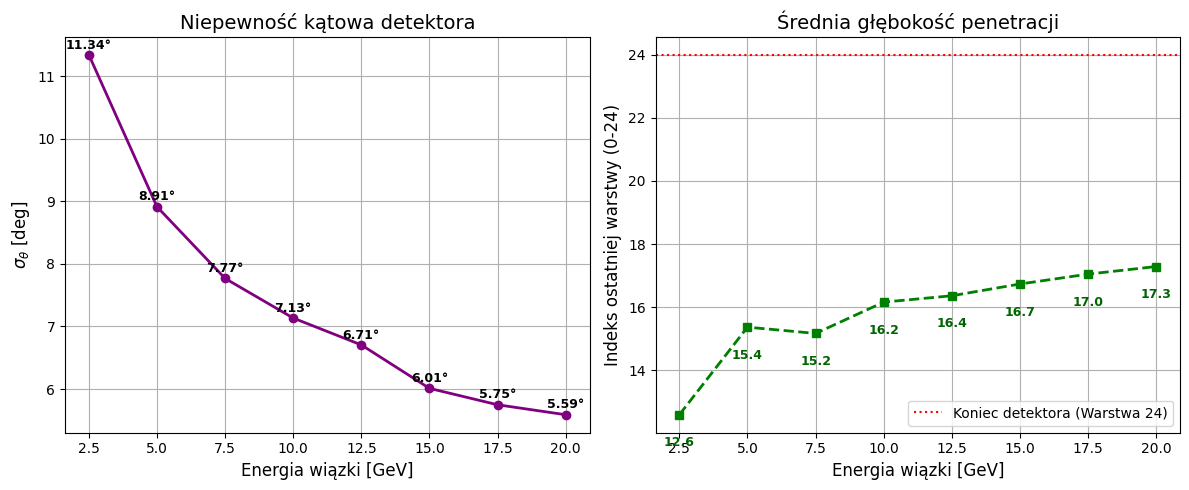


 Wyniki (rozmycie +/-20 stopni) 
Energia [GeV]   | Sigma [deg]     | Śr. Głębokość  
-------------------------------------------------------
2.5             | 11.3402         | 12.59          
5.0             | 8.9127          | 15.36          
7.5             | 7.7672          | 15.17          
10.0            | 7.1343          | 16.16          
12.5            | 6.7050          | 16.36          
15.0            | 6.0111          | 16.73          
17.5            | 5.7489          | 17.05          
20.0            | 5.5896          | 17.29          


In [15]:
### Analiza dla danych z rozmyciem +/- 10 stopni

import numpy as np
import matplotlib.pyplot as plt
import math

# optymalne E_cut dla każdej energii (z etapu I)
calibration_map = {
    25: 6.5, 50: 6.5, 75: 8.5, 100: 8.6,
    125: 9.5, 150: 10.0, 175: 10.3, 200: 10.7
}

file_energies = [25, 50, 75, 100, 125, 150, 175, 200]
folder = "ToyMC/output_20"  

Nx = 96                 
NL = 25                 
PIXEL_SIZE = 5.625      
CENTER_X_IDX = (Nx - 1) / 2.0  
LAYER_THICKNESS = 3.5   
Nevt_to_read = 5000     

angle_resolutions = []      # Tu zapiszemy Sigma kątowe
real_energies_gev = []      # Tu zapiszemy energie w GeV 
avg_penetration_depth = []  # Tu zapiszemy średnią głębokość kaskady

print(f"Rozpoczynam analizę danych z rozmyciem +/-20 stopni")

for energy_code in file_energies:
    # Przeliczenie kodu na rzeczywistą energię (np. 25 -> 2.5 GeV)
    real_energy = energy_code / 10.0
    real_energies_gev.append(real_energy)

    filename = f"{folder}/toymc_{energy_code}gev_20deg.dat"
    
    E_cut = calibration_map.get(energy_code, 6.5) 
    
    print(f"\n>> Analiza {real_energy:.1f} GeV (używam E_cut={E_cut} MIP)...")
    
    delta_angle_list = []     # Lista błędów kątowych dla tej energii
    max_layers_per_event = [] # Lista głębokości dla każdego zdarzenia
    
    
    try:
        with open(filename, 'rb') as infile:
            for _ in range(Nevt_to_read):
                head = np.fromfile(infile, dtype=np.int64, count=4) # [ID, N_dep, ?, N_list]
                if len(head) < 4: break 
                
                shift = np.fromfile(infile, dtype=np.float64, count=4) # [True_X, True_Y, True_AngleX, True_AngleY]
                true_angle_deg = shift[2] # Tutaj interesuje nas Kąt X (trzecia liczba)
                
                Nlist = head[3] # Liczba zapalonych pikseli
                if Nlist < 0: break 
                
                idlist = np.fromfile(infile, dtype=np.int64, count=Nlist) # ID zapalonych pikseli
                elist = np.fromfile(infile, dtype=np.float64, count=Nlist) # Energia w zapalonych pikselach
                
                # Dekodowanie adresów
                idl = idlist // 100000       
                idx = (idlist % 100000) // 100 
                
                layer_z = [] # Oś Z (numer warstwy)
                layer_x = [] # Oś X (wyznaczona pozycja w mm)
                
                for layer in range(NL): # Iterujemy przez 25 warstw
                    mask_layer = (idl == layer) # Wybieramy piksele tylko z obecnej warstwy
                    
                    if np.sum(mask_layer) > 0:
                        e_layer = elist[mask_layer]   # Energie w tej warstwie
                        idx_layer = idx[mask_layer]   # Indeksy X w tej warstwie
                        
                        # Filtr E_cut
                        mask_cut = e_layer > E_cut
                        if np.sum(mask_cut) > 0:
                            w = np.log(e_layer[mask_cut] / E_cut) # Wagi logarytmiczne
                            sum_w = np.sum(w)
                            
                            if sum_w > 0:
                                mean_idx = np.sum(idx_layer[mask_cut] * w) / sum_w # Środek ciężkości w tej warstwie
                                reco_x_mm = (mean_idx - CENTER_X_IDX) * PIXEL_SIZE
                                
                                # Dodajemy punkt pomiarowy do listy
                                layer_z.append(layer)
                                layer_x.append(reco_x_mm)
                
                # Analiza głębokości penetracji
                if len(layer_z) > 0:
                    # Sprawdzamy, jaki był największy numer warstwy z sygnałem
                    last_layer = max(layer_z) 
                    max_layers_per_event.append(last_layer)
                
                # Fitowanie prostej do punktów (layer_z, layer_x)
                if len(layer_z) >= 3:
                    params = np.polyfit(layer_z, layer_x, 1) 
                    slope = params[0] 
                    
                    # Obliczamy kąt 
                    reco_angle_rad = math.atan(slope / LAYER_THICKNESS)
                    reco_angle_deg = math.degrees(reco_angle_rad)
                    
                    # Zapisujemy błąd 
                    delta_angle_list.append(reco_angle_deg - true_angle_deg)

    except FileNotFoundError:
        print(f"POMINIĘTO: {filename}")
        angle_resolutions.append(None)
        avg_penetration_depth.append(None)
        continue

    if len(delta_angle_list) > 100:
        sigma_angle = np.std(delta_angle_list) # Odchylenie standardowe błędów kątowych
        angle_resolutions.append(sigma_angle)
        print(f"Niepewność kątowa: {sigma_angle:.4f} stopni")
    else:
        print("BŁĄD: Zbyt mało danych")
        angle_resolutions.append(None)

    # Obliczanie średniej głębokości
    if len(max_layers_per_event) > 0:
        avg_depth = np.mean(max_layers_per_event)
        avg_penetration_depth.append(avg_depth)
        print(f"Średnia ostatnia warstwa: {avg_depth:.2f} / 24.0")
    else:
        avg_penetration_depth.append(None)

# Wizualizacja wyników
plt.figure(figsize=(12, 5))

# Wykres 1: Niepewność kątowa
plt.subplot(1, 2, 1)
plt.plot(real_energies_gev, angle_resolutions, 'o-', color='purple', linewidth=2)
plt.title("Niepewność kątowa detektora", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel(r"$\sigma_{\theta}$ [deg]", fontsize=12)
plt.grid(True)
for x, y in zip(real_energies_gev, angle_resolutions):
    if y is not None:
        plt.text(x, y + 0.1, f"{y:.2f}°", ha='center', fontsize=9, fontweight='bold')

# Wykres 2: Średnia głębokość penetracji
plt.subplot(1, 2, 2)
# Filtrowanie None (na wypadek braku plików)
valid_x = [x for x, d in zip(real_energies_gev, avg_penetration_depth) if d is not None]
valid_y = [d for d in avg_penetration_depth if d is not None]

plt.plot(valid_x, valid_y, 's--', color='green', linewidth=2)
plt.axhline(y=24, color='red', linestyle=':', label='Koniec detektora (Warstwa 24)')
plt.title("Średnia głębokość penetracji", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel("Indeks ostatniej warstwy (0-24)", fontsize=12)
plt.legend()
plt.grid(True)
for x, y in zip(valid_x, valid_y):
    plt.text(x, y - 1.0, f"{y:.1f}", ha='center', fontsize=9, color='darkgreen', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabela wyników
print("\n Wyniki (rozmycie +/-20 stopni) ")
print(f"{'Energia [GeV]':<15} | {'Sigma [deg]':<15} | {'Śr. Głębokość':<15}")
print("-" * 55)
for e, sig, depth in zip(real_energies_gev, angle_resolutions, avg_penetration_depth):
    s_val = f"{sig:.4f}" if sig is not None else "---"
    d_val = f"{depth:.2f}" if depth is not None else "---"
    print(f"{e:<15.1f} | {s_val:<15} | {d_val:<15}")

# Analiza niepewności kątowej dla danych `output_20`
Poniższa tabela przedstawia wyniki rekonstrukcji: 
| Energia Wiązki [GeV] | Niepewność $\sigma_\theta$ [deg] | Średnia głębokość penetracji [warstwy] |
| :---: | :---: | :---: |
| 2.5 | 11.34 | 12.6 |
| 5.0 | 8.91 | 15.4 |
| 7.5 | 7.77 | 15.2 |
| 10.0 | 7.13 | 16.2 |
| 12.5 | 6.71 | 16.4 |
| 15.0 | 6.01 | 16.7 |
| 17.5 | 5.75 | 17.1 |
| 20.0 | 5.59 | 17.3 |

**Analiza zależności od energii i głębokości**  
Podobnie jak w przypadku węższej wiązki, obserwujemy znaczącą poprawę jakości rekonstrukcji wraz ze wzrostem energii. Wartość błędu spada z $11,3^\circ$ (dla 2.5 GeV) do $5,6^\circ$ (dla 20 GeV). Co istotne, niepewność detektora nie pogorszyła się drastycznie mimo zwiększenia zakresu kątowego wiązki (wyniki są zbliżone do `output_10`), co świadczy o stabilności algorytmu. 

Mechanizm fizyczny pozostaje ten sam: 
1) Dla 2.5 GeV kaskada wygasa średnio na 12-13 warstwie. Mała liczba punktów pomiarowych powoduje, że dopasowanie prostej jest wrażliwe na fluktuacje, co skutkuje dużym błędem ($>11^\circ$). 
2) Dla 20 GeV średnia penetracja sięga ponad 17 warstw. Dłuższy ślad cząstki pozwala na znacznie precyzyjniejsze zdefiniowanie jej kierunku.
3) Niezależnie od kąta padania (w zakresie do $20^\circ$), kaskady o energii 20 GeV nadal średnio kończą się na ~17 warstwie. Potwierdza to, że detektor jest wystarczająco głęboki, aby pomieścić kaskady również przy większym nachyleniu toru. 

**Wnioski w kontekście rozmycia $\pm 20^\circ$**  
Tu sytuacja wygląda korzystniej niż w przypadku `output_10` ze względu na szerszy zakres sygnału: 
1) Dla 2.5 GeV: Błąd pomiaru wynosi $11,3^\circ$. Choć jest to duża wartość, jest ona teraz mniejsza od maksymalnego wychylenia wiązki ($20^\circ$). Oznacza to, że nawet przy tak niskiej energii detektor zaczyna mieć zdolność rozróżniania, czy cząstka nadlatuje z "lewej" czy z "prawej" strony detektora (choć z dużą niepewnością). 
2) Dla > 10 GeV: Błąd spada do poziomu 6-7°. W zestawieniu z zakresem zmienności $\pm 20^\circ$ (rozpiętość całkowita $40^\circ$), detektor oferuje już przyzwoitą niepewność. Stosunek sygnału (kąta) do szumu (błędu rekonstrukcji) jest wyraźnie korzystny. 

**Podsumowanie**  
Zwiększenie kątowego rozrzutu wiązki do $\pm 20^\circ$ nie wpłynęło negatywnie na zdolność detektora do rekonstrukcji śladu. Głównym czynnikiem limitującym precyzję pozostaje głębokość penetracji kaskady (zależna od energii), a nie sam kąt padania.

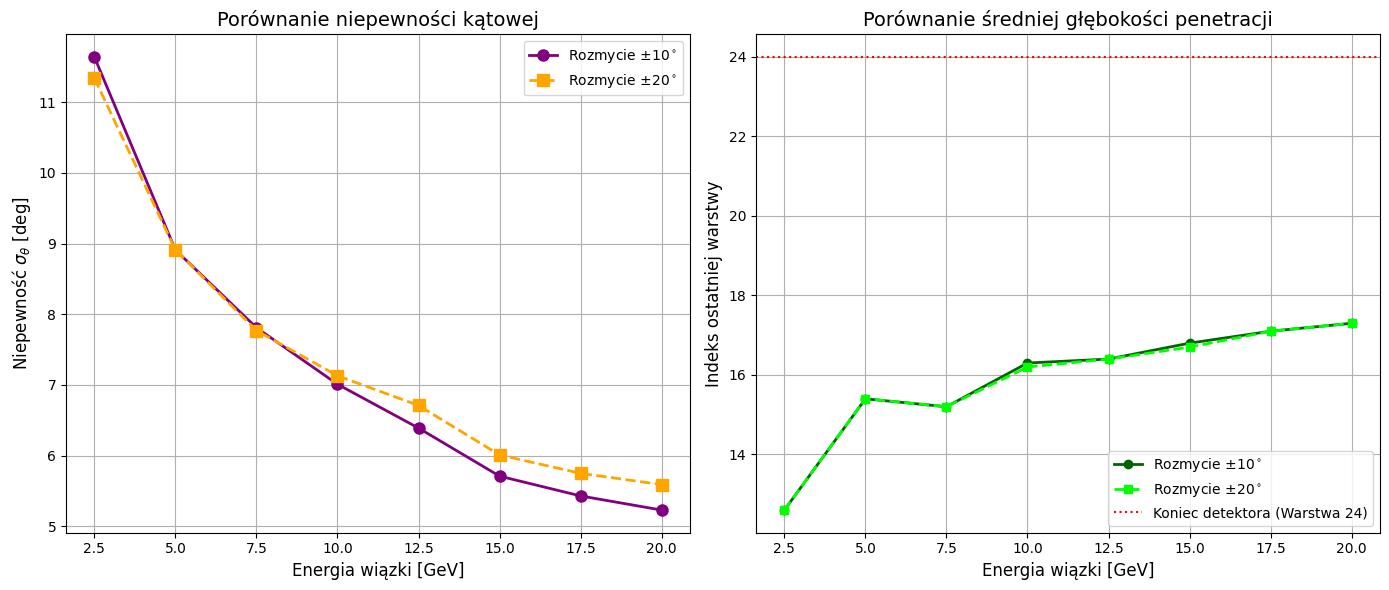

In [17]:
# Porównanie wyników dla rozmycia +/-10 i +/-20 stopni

energies_gev = [2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0]

sigma_10 = [11.64, 8.91, 7.81, 7.01, 6.39, 5.71, 5.43, 5.23]
depth_10 = [12.6, 15.4, 15.2, 16.3, 16.4, 16.8, 17.1, 17.3]

sigma_20 = [11.34, 8.91, 7.77, 7.13, 6.71, 6.01, 5.75, 5.59]
depth_20 = [12.6, 15.4, 15.2, 16.2, 16.4, 16.7, 17.1, 17.3]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(energies_gev, sigma_10, 'o-', color='purple', label=r'Rozmycie $\pm 10^\circ$', linewidth=2, markersize=8)
plt.plot(energies_gev, sigma_20, 's--', color='orange', label=r'Rozmycie $\pm 20^\circ$', linewidth=2, markersize=8)

plt.title("Porównanie niepewności kątowej", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel(r"Niepewność $\sigma_{\theta}$ [deg]", fontsize=12)
plt.legend()
plt.grid(True)



# Wykres 2: Porównanie Głębokości
plt.subplot(1, 2, 2)
plt.plot(energies_gev, depth_10, 'o-', color='darkgreen', label=r'Rozmycie $\pm 10^\circ$', linewidth=2)
plt.plot(energies_gev, depth_20, 's--', color='lime', label=r'Rozmycie $\pm 20^\circ$', linewidth=2)
plt.axhline(y=24, color='red', linestyle=':', label='Koniec detektora (Warstwa 24)')

plt.title("Porównanie średniej głębokości penetracji", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel("Indeks ostatniej warstwy", fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

